In [4]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# 데이터 시각화 (Matplotlib) 활용와 왕좌의 게임 데이터 분석

## 1. <a href = https://matplotlib.org/>Matplotlib</a> 개요
- 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지  
- 2002년 파이썬에서 MATLAB과 유사한 인터페이스를 지원하고자 프로젝트가 시작됨 
- 데이터 시각화를 위해 가장 많이 활용되는 패키지. 최근 bokeh, seaborn과 같은 새로운 시각화 패키지들도 많이 활용되지만, 이 패키지들도 모두 matplotlib과 비슷한 인터페이스를 지원하므로, matplotlib를 이해하면, 배우는 데 어렵지 않다.  
- Matplotlib는 라인 플롯, 바 차트, 파이차트, 히스토그램 등 정형화된 차트나 플롯 이외에도 저수준 api를 사용한 다양한 시각화 기능 제공
- <a href = https://matplotlib.org/gallery/index.html> matplotlib 갤러리</a>에서 다양한 예제/샘플 참고 가능

## 2. Matplotlib 사용법
Matplotlib를 사용하기 위해서는 먼저 <a href = https://matplotlib.org/api/pyplot_api.html>matplotlib.pyplot</a> 을 아래와 같이 import 한다. 
pyplot 객체는 matplotlib의 핵심 모듈로써, figure 생성, 그래프 생성/수정 등 시각화에 필요한 중요 기능을 제공한다. 현재의 figure의 현재 axes에 함수의 결과를 적용한다.  

- figure : 그래프를 그리기 위한 하얀 도화지 개념
- axes (subplot) : figure 안에 그리는 그래프를 지칭함.axes 혹은 subplot이라고 한다. 하나의 figure 안에 여러 개의 axes를 그릴 수 있으나, 하나의 axes는 여러 개의 figure에 속할 수 없다.
<img src="img/예제실습/그림의구조.jpg" alt="그림의구조" style="width: 1200px;"/>

pyplot을 다른 이름으로 사용할 수 있지만, 보통 plt 라는 alias를 사용한다.   
다음 plt.plot()은 라인 플롯을 그리는 함수인데, X축은 a,b,c이고, 값은 10, 20, 30인 라인 플롯을 그리는 예제이다.   
마지막으로 실제 그림을 표시하는 함수인 plt.show()을 호출한다. 보통 plot() 함수를 수행하면 그래프가 표시되므로, plt.show()는 생략하는 경우도 많다.   

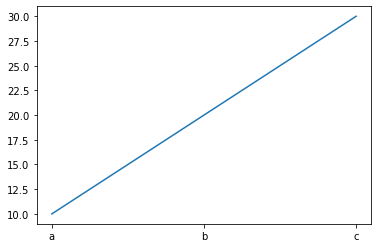

In [2]:
import matplotlib.pyplot as plt

sr = Series(  [10, 20, 30], index = ['a', 'b', 'c']  )
plt.plot(sr)

## 3. matplotlib 간단 실습

### 3.1 하나의 그래프 그리기
3.1.1 line graph 그리기

In [15]:
sr = Series([1,2,4,8,16], index = list('abcde')) # 실습을 위한 샘플 데이터 생성
sr

a     1
b     2
c     4
d     8
e    16
dtype: int64

3.1.2 bar graph 그리기

In [16]:
# 샘플 데이터 생성
import random 
sr2 = Series(random.sample(range(100, 1000), 5), 
             index = list('abcde'))
sr2

a    227
b    543
c    506
d    429
e    413
dtype: int64

<BarContainer object of 5 artists>

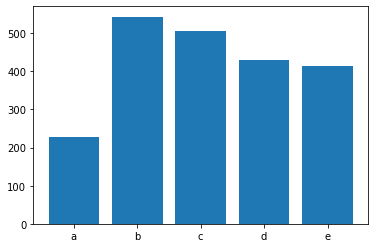

In [17]:
# plt.bar(x = sr2.index, height = sr2.values)
plt.bar(sr2.index, sr2.values)

pandas의 Series와 DataFrame은 데이터 시각화를 위하여 plot() 함수를 제공한다. plot() 함수를 사용하면, 내부적으로 matplotlib에 연관 함수가 호출되면서 그래프가 그려진다.

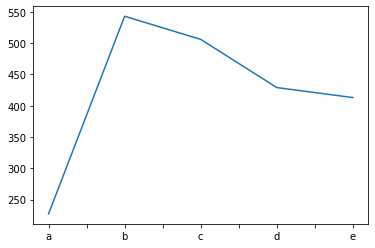

In [18]:
sr2.plot()

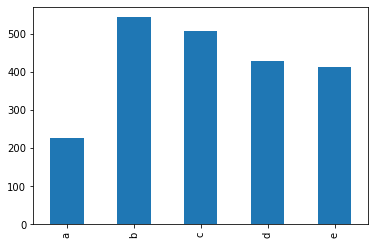

In [19]:
sr2.plot(kind = 'bar')

3.1.3 두 개의 그래프를 하나로 그리기

- <a href = https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplots.html> plt.subplots() </a> 함수는 새로운 figure와 axes(subplots)를 생성해 준다.

<BarContainer object of 5 artists>

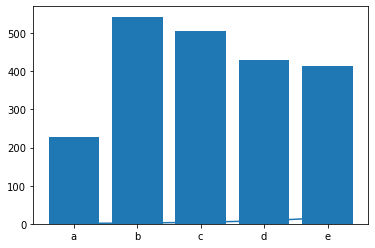

In [20]:
fig, ax = plt.subplots()    # subplots() 함수는 새로운 figure와 axes를 튜플로 리턴
ax.plot(sr)
ax.bar(sr2.index, sr2.values)

3.14 두 개 그래프를 서로 다른 y축 적용하기

<BarContainer object of 5 artists>

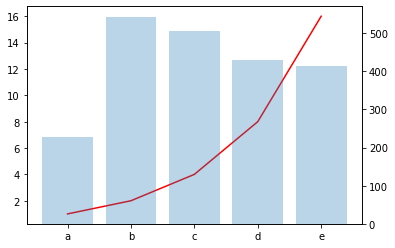

In [21]:
fig, ax1 = plt.subplots()
ax1.plot(sr, color = 'r')
ax2 = ax1.twinx()  # X축을 공유하는 새로운 axes 생성
ax2.bar(sr2.index, sr2.values, alpha=0.3)

### 3.2. 여러 개 그래프 그리기 
하나의 figure 안에 여러 개의 axes를 그리기

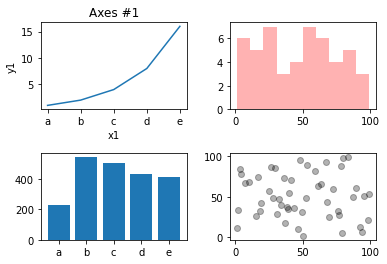

In [32]:
fig ,ax_list = plt.subplots(2, 2)    # 2 by 2로 4개의 axes 만듦
ax_list[0,0].plot(sr)
ax_list[0,0].set_title('Axes #1')
ax_list[0,0].set_xlabel('x1')
ax_list[0,0].set_ylabel('y1')

ax_list[0,1].hist(random.sample(range(1,100), 50), bins = 10, color = 'r', alpha = 0.3)
ax_list[1,0].bar(sr2.index, sr2.values)
ax_list[1,1].scatter(random.sample(range(1,100), 50), random.sample(range(1,100), 50), 
                     color = 'k', alpha = 0.3)

plt.subplots_adjust(hspace = .5, wspace = .3)

### 3.3. <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> backend </a> 개념
Matplotlib은 매우 다양한 usecase에 사용되며, 이를 모두 충족시키기 위하여 다양한 backend를 지원함.  
가장 많이 활용하는 옵션은 inline으로, 그래프를 output창에 바로 표현되도록 하는 옵션이며, <strong>%maptlotlib inline</strong>를 실행하여 설정한다. 


%로 시작하는 명령어는 Cell Magic 명령어로써, 파이썬 코드가 아니라 Jupyter에게 특정 기능을 수행하도록 하는 명령이다. 즉, %matplotlib inline 명령은 Jupyter에게 matplotlib 그래프를 출력 영역에 표시할 것을 지시하는 명령이다.

In [38]:
# backend를 inline으로 설정
%matplotlib inline

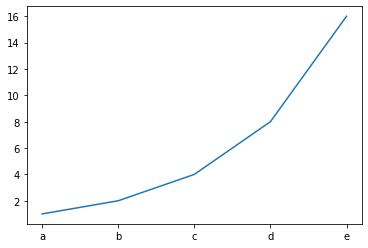

In [34]:
plt.plot(sr)

만약 그래프를 생성한 이후, interactive하게 그래프를 다루고 싶은 경우에는 backend를 interactive backend로 설정하면 된다.  
예를 들어, <strong>%matplotlib nbagg</strong>를 실행하여 <strong>nbagg</strong>으로 설정을 변경할 수 있다.   
보다 다양한 설정 옵션을 확인하려면 <a href = https://matplotlib.org/3.1.1/tutorials/introductory/usage.html#what-is-a-backend> 여기 </a>를 참고하면 된다.  

아래와 같이 nbagg로 설정한 후, 그래프를 생성하면 output 창에 몇몇 버튼과 함께 그래프가 그려진다.  
버튼들을 활용하여 zoon-in, zoom-out이 가능하다.   
그래프를 그린 이후, set_title(), set_xlabel() 함수를 수행하면 현재 그래프에 적용되는 것을 확인할 수 있으며, 오른쪽 상단에 있는 파란색 버튼을 클릭하면 interactive 모드가 종료된다. 

<IPython.core.display.Javascript object>


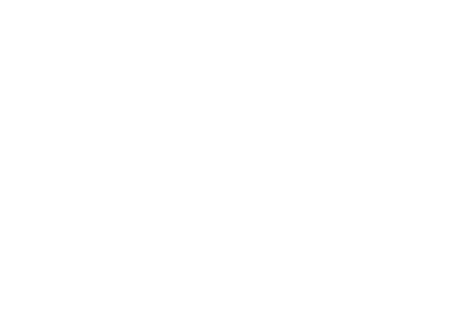

<IPython.core.display.Javascript object>


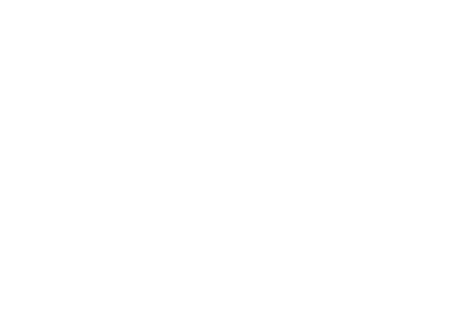

In [35]:
# backend 을 interactive 시각화를 할 수 있도록 설정 가능
%matplotlib nbagg
fig, ax = plt.subplots()
ax.plot(sr)

In [51]:
ax.set_title('Axes #1')

Text(0.5, 1.0, 'Axes #1')

In [52]:
ax.set_xlabel('x-axis label')

Text(0.5, 18.25, 'x-axis label')

### 3.4 <a href = https://matplotlib.org/users/customizing.html> matplotlib 설정 변경</a>

<strong> 3.4.1 stylesheet 변경</strong>   
   matplotlib을 통해 데이터 시각화할 때 적용되는 스타일을 변경 가능하며, 사용가능한 스타일시트 목록 및 샘플은 <a href= https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html> 여기 </a>에서 확인 가능하다.

In [36]:
# 사용가능한 style 출력
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

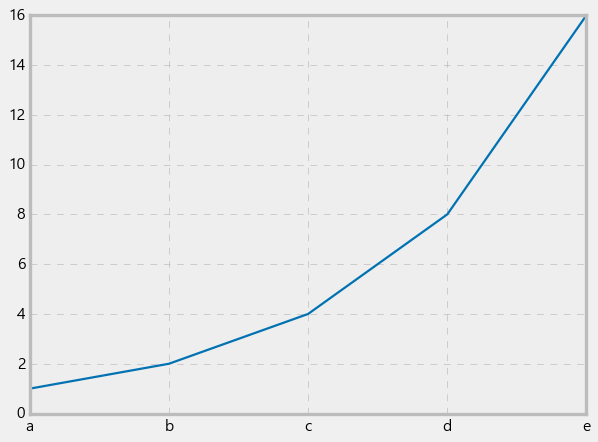

In [58]:
plt.style.use('seaborn-colorblind')
plt.plot(sr)

3.4.2 <strong> <i> matplotlibrc</i></strong> 파일 수정을 통한 파라미터 수정 
- matplotlibrc 파일을 통해 figure 크기, axes의 폰트사이즈, 색상, 스타일 등 matplotlib의 모든 속성(property)들을 설정 가능하다. 
- 파일을 변경한 후 저장하면, 이후에는 변경된 설정이 계속 사용된다.
- matplotlibrc 파일을 수정한 후에는 jupyter notebook을 재시작해야 수정 내용이 반영된다. 


matplotlibrc 파일의 위치를 찾으려면 matplotlib.matplot.lib_fname()를 수행하면 된다.

In [41]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Anaconda3\\envs\\py36\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

3.4.3 matplotlib.rcParams을 통한 동적 설정 변경

- matplotlib의 설정 정보는 <strong> matplotlib.rcParams</strong>에 저장되어 있으며, rcParams는 <strong><i>사전(Dict)</i></strong> 타입니다.
- rcParams 변경을 통해 동적으로 설정이 변경가능하며, 변경 즉시 반영된다. 

In [42]:
# 현재 전체 설정 정보 확인
matplotlib.rcParams

RcParams({'_internal.classic_mode': True,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'mpeg4',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'round_numbers',
          'axes.axisbelow': False,
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 2,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [45]:
# 특정 설정 정보 확인
matplotlib.rcParams['font.family']

['sans-serif']

In [51]:
# 설정 변경
matplotlib.rcParams['font.family'] = "Malgun Gothic"
# 한글 깨짐 방지를 위해 font family 변경
# window, linux 계열은 Malgun Gothic으로, MacOS는 AppleGothic으로 변경

### 3.5 <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>Pandas의 plot() 함수를 통한 시각화</a>
- pandas의 대표적인 데이터타입인 Series와 DataFrame은 plot() 함수를 제공하며 이를 통해 여러 차트를 그릴 수 있다.   
- 내부적으로는 Series.plot()과 DataFrame.plot() 모두 matplotlib를 사용하며, 파라미터 인자에 따라 적절한 함수가 호출된다.  
- matplotlib은 plot()은 line graph, bar()는 bar graph, hist()는 히스토그램 등 차트의 종류에 따라 다른 함수를 호출해야 하지만, **pandas는 차트의 종류에 상관 없이, 차트를 그리는 함수는 plot()이며, kind 인자를 통해 차트의 종류를 설정할 수 있다.**   
- matplotlib의 함수들을 직접 사용하는 것보다 사용자 친화적인 인터페이스를 제공하지만, matplotlib의 모든 기능을 제공하지는 않으므로 약간의 불편함은 존재한다.


In [63]:
인구통계 = {'서울': [1053.5, 1023, 987],
        '경기':[1023, 1067, 1123],
        '충청':[512,489,487],
        '경상':[897, 872, 811],
        '전라':[451, 421, 399]
      }
df = DataFrame(인구통계)
df.index = [2015, 2016, 2017]
df

,서울,경기,충청,경상,전라
2015,1053.5,1023,512,897,451
2016,1023.0,1067,489,872,421
2017,987.0,1123,487,811,399


기본 그리기 - <a href= https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D>line graph</a>  
row index가 x축, col index가 계열.

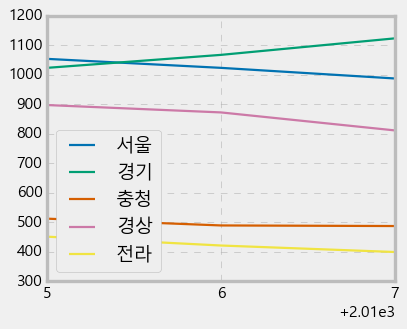

In [61]:
df.plot(  figsize = (5,4),
       kind = 'line',
       xticks = [2015, 2016, 2017] )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EFB51CB00>,
      dtype=object)

C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\envs\py36\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


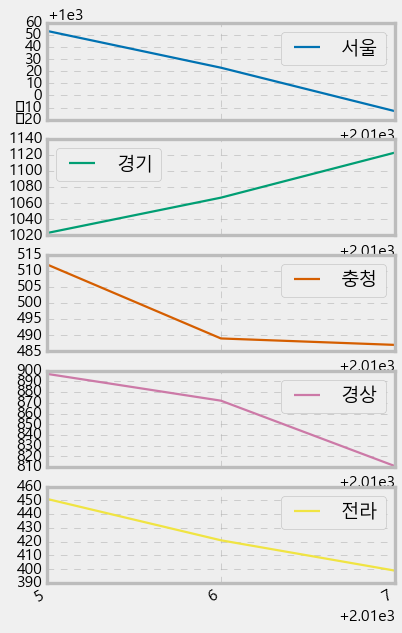

In [66]:
df.plot(  figsize = (5,10),
       kind = 'line',
       xticks = [2015, 2016, 2017],
       subplots = True    # 계열별로 각각의 axes
       )

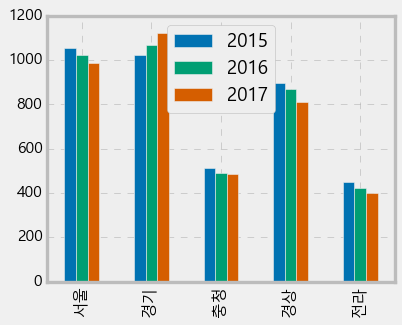

In [68]:
df.T.plot(  figsize = (5,4),
       kind = 'bar')

<img src="img/예제실습/matplotlib인자.jpg" alt=" matplotlib" style="width: 1200px;"/>

#### 색상: https://matplotlib.org/examples/color/named_colors.html
#### 기타 스타일: https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D

In [69]:
df

,서울,경기,충청,경상,전라
2015,1053.5,1023,512,897,451
2016,1023.0,1067,489,872,421
2017,987.0,1123,487,811,399


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012EFB756320>,
      dtype=object)

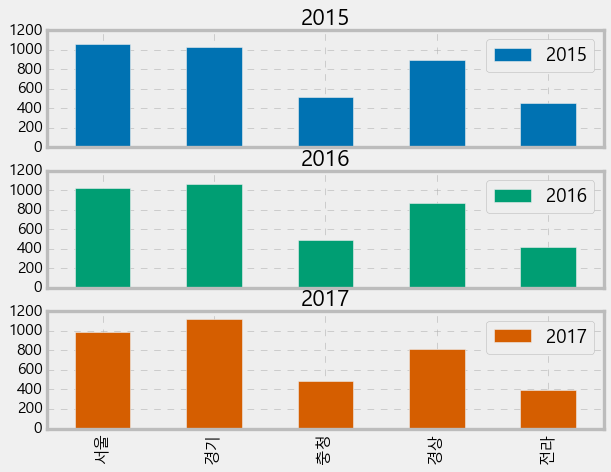

In [70]:
# 실습. 연도별 지역별 인구수 그래프 그리기
df.T.plot(
    kind = 'bar',
    subplots = True,
)

In [6]:
sample = DataFrame({'men_means' : [20, 34, 30, 35, 27],
                    'women_means' : [25, 32, 34, 20, 25]},
                    index = ['G1', 'G2', 'G3', 'G4', 'G5'])
sample

,men_means,women_means
G1,20,25
G2,34,32
G3,30,34
G4,35,20
G5,27,25


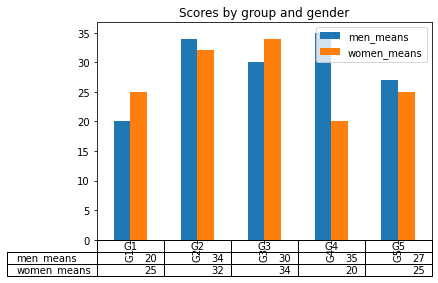

In [8]:
sample.plot(kind = 'bar', title='Scores by group and gender',
           table = True)

### 3.6 matplotlib 기반 최신 시각화 라이브러리 소개
1. <a href = https://seaborn.pydata.org/>seaborn</a>
  - matplotlib을 기반으로 만들어진 시각화 라이브러리
  - 디자인적으로 훨씬 세련됨.  
  - matplotlib와 사용방식이 유사하므로 쉽고 빠르게 습득할 수 있음.


2. <a href = https://bokeh.pydata.org/en/latest/>bokeh</a>
  - 웹브라우저 상에서의 시각화에 효과적인 파이썬 인터랙티브 시각화 라이브러리
  - 플롯을 html 파일로 export하여 이를 웹브라우저를 통해 확인할 수 있음.
  - matplotlib와 비슷, jupyter와 호환이 잘 됨. 


3. <a href = https://github.com/python-visualization/folium>Folium </a>
  - 지리적 데이터 시각화에 특화된 라이브러리 (leaflet.js 기반)
  - 웹브라우저에서 확인 가능
  - 지도 데이터 사용을 위해 선행되어야 하는 작업이 원래 매우 많은데, 이러한 선행작업을 간단화함.
  - http://python-visualization.github.io/folium/docs-v0.5.0/
  - http://pinkwink.kr/971

### 3.7 왕좌의 게임 데이터 분석 및 시각화 실습
#### 1) 데이터 적재
- battless.csv : 전투의 이름, 발생년도, 공격/수비 정보(가문, 왕, 군대 규모 등)을 저장
- deaths.csv : 캐릭터들의 이름, 성별 등 기본 정보와 사망 정보

In [9]:
battles = pd.read_csv('data/data-society-game-of-thrones/battles.csv')
death = pd.read_csv('data/data-society-game-of-thrones/character-deaths.csv')

In [11]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [12]:
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


#### 2) 책의 챕터(Book of Death)별로 사망자 수 추이 시각화

In [19]:
death['Book of Death']

0      NaN
1      3.0
2      NaN
3      5.0
4      NaN
      ... 
912    NaN
913    5.0
914    5.0
915    5.0
916    4.0
Name: Book of Death, Length: 917, dtype: float64

In [20]:
bookOfDeath = death['Book of Death'].value_counts().sort_index()
# NaN은 제외된 채로 value_counts
bookOfDeath

1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

Text(0.5, 0, 'Book of death')

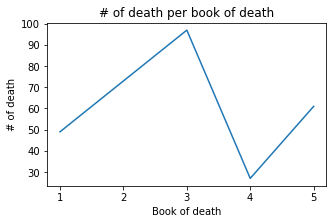

In [28]:
ax = bookOfDeath.plot(title = "# of death per book of death",
#                 xticks=[1,2,3,4,5],
                 xticks = bookOfDeath.index,
                figsize = (5,3))

ax.set_ylabel("# of death")
ax.set_xlabel("Book of death")

In [29]:
# 그래프를 이미지 파일로 저장
ax.figure.savefig('test.jpg')

SyntaxError: invalid syntax (<ipython-input-29-cd9ed44f0fab>, line 2)

#### 3) 대규모 전투의  공격진영과 수비 진영의 숫자 시각화
대규모 전투 = 공격과 수비 모두 합쳐서 10,000명 이상 참가한 전쟁

In [30]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [31]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [38]:
# 1. 대규모 전투만 선택
# 하나가 NaN인 경우 나머지 하나만 더하도록 하려면 add() 사용
big_battles_flag = battles.attacker_size.add(battles.defender_size, fill_value=0) >= 10000
big_battles = battles[big_battles_flag]

In [39]:
# 2. 필요한 컬럼만 선택
big_battles = big_battles[['name', 'attacker_size', 'defender_size']]
big_battles

,name,attacker_size,defender_size
0,Battle of the Golden Tooth,15000.0,4000.0
2,Battle of Riverrun,15000.0,10000.0
3,Battle of the Green Fork,18000.0,20000.0
5,Battle of the Camps,6000.0,12625.0
14,Battle of Oxcross,6000.0,10000.0
15,Siege of Storm's End,5000.0,20000.0
16,Battle of the Fords,20000.0,10000.0
19,Battle of the Blackwater,21000.0,7250.0
27,Battle of Castle Black,100000.0,1240.0
37,Siege of Winterfell,5000.0,8000.0


In [41]:
# name 컬럼을 row index로 변환
big_battles.set_index('name', inplace = True)

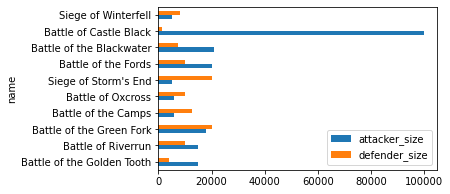

In [44]:
big_battles.plot(  figsize = (5,3), 
                 kind = 'barh'  )

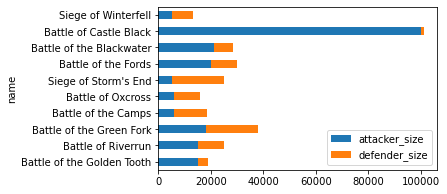

In [46]:
big_battles.plot(  figsize = (5,3), 
                 kind = 'barh',
                stacked = True)

#### (실습 #1) 가문 별로 전쟁을 참여한 횟수 시각화

In [109]:
Q1data = battles.loc[:, 'attacker_1':'defender_4']
Q1data

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [112]:
Q1data.attacker_1.value_counts()

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Free folk                      1
Brotherhood without Banners    1
Brave Companions               1
Bracken                        1
Darry                          1
Name: attacker_1, dtype: int64

In [113]:
type(Q1data.attacker_1.value_counts())

pandas.core.series.Series

In [114]:
pd.DataFrame(Q1data.attacker_1.value_counts())

,attacker_1
Lannister,8
Stark,8
Greyjoy,7
Baratheon,6
Frey,2
Bolton,2
Free folk,1
Brotherhood without Banners,1
Brave Companions,1
Bracken,1


In [129]:
Q1 = pd.concat([
    pd.DataFrame(Q1data.attacker_1.value_counts()),
    pd.DataFrame(Q1data.attacker_2.value_counts()),
    pd.DataFrame(Q1data.attacker_3.value_counts()),
    pd.DataFrame(Q1data.attacker_4.value_counts()),
    pd.DataFrame(Q1data.defender_1.value_counts()),
    pd.DataFrame(Q1data.defender_2.value_counts()),
    pd.DataFrame(Q1data.defender_3.value_counts()),
    pd.DataFrame(Q1data.defender_4.value_counts()),
]).fillna(0)
Q1

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
Lannister,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stark,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Greyjoy,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baratheon,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Frey,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolton,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free folk,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brotherhood without Banners,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brave Companions,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bracken,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
Q1 = Q1.sum(axis=1)
Q1

Lannister                      8.0
Stark                          8.0
Greyjoy                        7.0
Baratheon                      6.0
Frey                           2.0
Bolton                         2.0
Free folk                      1.0
Brotherhood without Banners    1.0
Brave Companions               1.0
Bracken                        1.0
Darry                          1.0
Tully                          3.0
Karstark                       2.0
Frey                           1.0
Lannister                      1.0
Thenns                         1.0
Greyjoy                        1.0
Bolton                         1.0
Mormont                        2.0
Giants                         1.0
Glover                         2.0
Lannister                      9.0
Stark                          8.0
Baratheon                      4.0
Tully                          4.0
Greyjoy                        3.0
Tyrell                         2.0
Brave Companions               2.0
Darry               

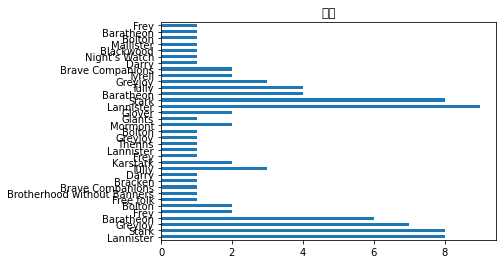

In [132]:
Q1.plot(
    kind = 'barh',
    title = '가문',
)

#### (실습 #2) 년도별로 사망자의 숫자와 전쟁이 벌어진 횟수 시각화

In [59]:
battles.iloc[0]

name                  Battle of the Golden Tooth
year                                         298
battle_number                                  1
attacker_king           Joffrey/Tommen Baratheon
defender_king                         Robb Stark
attacker_1                             Lannister
attacker_2                                   NaN
attacker_3                                   NaN
attacker_4                                   NaN
defender_1                                 Tully
defender_2                                   NaN
defender_3                                   NaN
defender_4                                   NaN
attacker_outcome                             win
battle_type                       pitched battle
major_death                                    1
major_capture                                  0
attacker_size                              15000
defender_size                               4000
attacker_commander               Jaime Lannister
defender_commander  

In [61]:
death.iloc[1]

Name                  Aegon Frey (Jinglebell)
Allegiances                              None
Death Year                                299
Book of Death                               3
Death Chapter                              51
Book Intro Chapter                         49
Gender                                      1
Nobility                                    1
GoT                                         0
CoK                                         0
SoS                                         1
FfC                                         0
DwD                                         0
Name: 1, dtype: object

In [72]:
battles['year'].value_counts()

299    20
300    11
298     7
Name: year, dtype: int64

In [63]:
battles.year

0     298
1     298
2     298
3     298
4     298
5     298
6     298
7     299
8     299
9     299
10    299
11    299
12    299
13    299
14    299
15    299
16    299
17    299
18    299
19    299
20    299
21    299
22    299
23    299
24    299
25    299
26    299
27    300
28    300
29    300
30    300
31    300
32    300
33    300
34    300
35    300
36    300
37    300
Name: year, dtype: int64

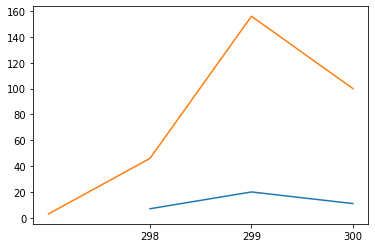

In [106]:
Q2 = battles['year'].value_counts().sort_index()
Q22 = death['Death Year'].value_counts().sort_index()

Q2.plot(
    kind = 'line',
#     title = '# of battles',
    xticks = Q2.index
)
Q22.plot(
    kind = 'line',
#     title = '# of deaths',
#     xticks = Q22.index
)

In [92]:
battles['year'].value_counts().sort_index().index

Int64Index([298, 299, 300], dtype='int64')

#### practice ans

##### Q1

In [133]:
# 1. 원하는 컬럼만 선택
battles[['attacker_1', 'attacker_2','attacker_3', 'attacker_4',\
         'defender_1', 'defender_2', 'defender_3', 'defender_4']]

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [138]:
battles[battles.columns[5:13]]

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [139]:
battles.loc[:, 'attacker_1':'defender_4']

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [140]:
battles.iloc[:, 5:13]

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
5,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN
6,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN
7,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
8,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN
9,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN


In [163]:
# 정규 표현식 (regular expression) 활용
cols = battles.columns[  battles.columns.str.contains('attacker_[1-4]|defender_[1-4]')  ]
cols

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [164]:
ex1 = battles[cols]
ex1.head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


In [161]:
ex1.attacker_1.value_counts()
# ex1.value_counts() 는 에러. 이 함수는 Series에만 적용되는 집계 함수.
# 8개의 컬럼에 대해 value_counts() 한 다음에 다 더 하면 됨.

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Frey                           2
Bolton                         2
Free folk                      1
Brotherhood without Banners    1
Brave Companions               1
Bracken                        1
Darry                          1
Name: attacker_1, dtype: int64

In [165]:
# ex1.attacker_1.value_counts().add(  ex1.attacker_2.value_counts(), fill_value = 0  )
ex1.columns

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [168]:
ex1_result = Series()
for col in ex1.columns :
    ex1_result = ex1_result.add(ex1[col].value_counts(), fill_value = 0)

ex1_result

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

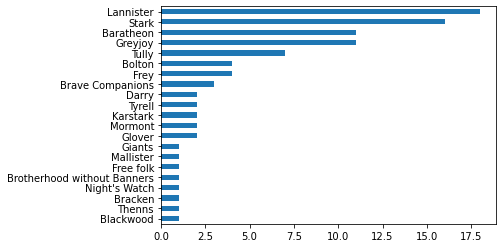

In [170]:
ex1_result.sort_values().plot(kind='barh')

##### Q2

In [171]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [174]:
# 1. 년도별 사망자 수 구하기
death_per_year = death['Death Year'].value_counts().sort_index()
death_per_year

297.0      3
298.0     46
299.0    156
300.0    100
Name: Death Year, dtype: int64

In [175]:
# 2. 년도별 전쟁 횟수 구하기
battles.pivot_table(index = 'year', aggfunc = 'count', values = 'battle_number')

,battle_number
year,
298,7
299,20
300,11


In [178]:
battles_per_year = battles['year'].value_counts().sort_index()
battles_per_year

298     7
299    20
300    11
Name: year, dtype: int64

In [180]:
# 3. death_per_year와 battle_per_year 를 하나의 데이터프레임으로 합치기
death_battles_corr = pd.concat([  death_per_year, battles_per_year  ], axis=1)
death_battles_corr

,Death Year,year
297.0,3,NaN
298.0,46,7.0
299.0,156,20.0
300.0,100,11.0


In [182]:
death_battles_corr.columns = [  '# of Death', '# of Battles'  ]

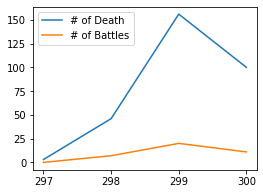

In [186]:
death_battles_corr.fillna(0).plot(
    xticks = death_battles_corr.index,
    figsize = (4,3)
)

In [187]:
death_battles_corr.corr()

,# of Death,# of Battles
# of Death,1.000000,0.978443
# of Battles,0.978443,1.000000


correlation을 보니, 두 변수는 굉장히 높은 양의 상관관계이다.